# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed T
1.  The best linear regressions are seen in the latitude versus max temperature for Northern Hemisphere and Southern Hemisphere. There seems to be a strong relationship between temperature and latitude.
2.  Latitude especially doesn't have a strong relationship with wind speed. The wind speed seems to be relatively steady at all latitudes.
3.  The humidity of loaction does not seem to have a correlation to either hemisphere. Both hemispheres have high humidity and the scatter plot is all over the splace. We can conclude that there is poor correlation between humidity and latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [1]:
url = "http://api.openweathermap.org/data/2.5/weather?appid="
target_url = url + weather_api_key




NameError: name 'weather_api_key' is not defined

In [2]:
units = "imperial"

query = f"{target_url}&units={units}&q="


NameError: name 'target_url' is not defined

In [5]:
#set up lists to hold the response information
country = []
cityname = []
cloudiness = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []
count_city = 1
set_one = 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query + city).json()
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if count_city > 49:
            count_city = 0
            set_one = set_one + 1
    
        else:
            count_city = count_city + 1
            
        print(f"Processing Record {count_city} of Set {set_one} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        
        


Processing Record 2 of Set 1 : ahipara
City not found. Skipping...
Processing Record 3 of Set 1 : saint-philippe
Processing Record 4 of Set 1 : jamestown
Processing Record 5 of Set 1 : rikitea
City not found. Skipping...
Processing Record 6 of Set 1 : udachnyy
Processing Record 7 of Set 1 : zambezi
City not found. Skipping...
Processing Record 8 of Set 1 : aklavik
Processing Record 9 of Set 1 : castro
Processing Record 10 of Set 1 : saldanha
Processing Record 11 of Set 1 : busselton
City not found. Skipping...
Processing Record 12 of Set 1 : mataura
City not found. Skipping...
Processing Record 13 of Set 1 : thies
Processing Record 14 of Set 1 : severo-kurilsk
Processing Record 15 of Set 1 : ambilobe
Processing Record 16 of Set 1 : ancud
Processing Record 17 of Set 1 : punta arenas
Processing Record 18 of Set 1 : andenes
Processing Record 19 of Set 1 : ostrovnoy
Processing Record 20 of Set 1 : coruripe
Processing Record 21 of Set 1 : saint george
Processing Record 22 of Set 1 : vaini
P

Processing Record 33 of Set 4 : bambous virieux
Processing Record 34 of Set 4 : arraial do cabo
Processing Record 35 of Set 4 : freeport
Processing Record 36 of Set 4 : sukhobezvodnoye
City not found. Skipping...
Processing Record 37 of Set 4 : astana
Processing Record 38 of Set 4 : beringovskiy
Processing Record 39 of Set 4 : ballitoville
Processing Record 40 of Set 4 : serenje
Processing Record 41 of Set 4 : constitucion
Processing Record 42 of Set 4 : ouadda
Processing Record 43 of Set 4 : mar del plata
Processing Record 44 of Set 4 : okhotsk
Processing Record 45 of Set 4 : chuguyevka
Processing Record 46 of Set 4 : deputatskiy
Processing Record 47 of Set 4 : mitsamiouli
Processing Record 48 of Set 4 : arman
Processing Record 49 of Set 4 : bairiki
Processing Record 50 of Set 4 : nouakchott
Processing Record 0 of Set 5 : dikson
Processing Record 1 of Set 5 : great yarmouth
Processing Record 2 of Set 5 : komsomolskiy
Processing Record 3 of Set 5 : buala
Processing Record 4 of Set 5 : 

Processing Record 18 of Set 8 : maumere
Processing Record 19 of Set 8 : peace river
Processing Record 20 of Set 8 : karratha
Processing Record 21 of Set 8 : erdenet
Processing Record 22 of Set 8 : trairi
City not found. Skipping...
Processing Record 23 of Set 8 : bonfim
Processing Record 24 of Set 8 : balkanabat
Processing Record 25 of Set 8 : leo
Processing Record 26 of Set 8 : saint-augustin
Processing Record 27 of Set 8 : corinto
Processing Record 28 of Set 8 : isla mujeres
Processing Record 29 of Set 8 : novyy urengoy
Processing Record 30 of Set 8 : nampa
Processing Record 31 of Set 8 : kabanjahe
Processing Record 32 of Set 8 : yumen
Processing Record 33 of Set 8 : morehead
City not found. Skipping...
Processing Record 34 of Set 8 : waingapu
Processing Record 35 of Set 8 : banda aceh
Processing Record 36 of Set 8 : puerto escondido
Processing Record 37 of Set 8 : ribas do rio pardo
Processing Record 38 of Set 8 : revyakino
Processing Record 39 of Set 8 : esperance
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_city_df = pd.DataFrame({ 
                "City" : cityname,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
})

In [7]:
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,65.35,72,96,11.95,NZ,1650839488
1,Saint-Philippe,-21.3585,55.7679,72.99,79,90,14.03,RE,1650839489
2,Jamestown,42.0970,-79.2353,80.24,31,0,12.66,US,1650839489
3,Rikitea,-23.1203,-134.9692,73.02,89,100,16.44,PF,1650839490
4,Udachny,66.4167,112.4000,10.17,93,58,2.48,RU,1650839490
...,...,...,...,...,...,...,...,...,...
549,Saint-François,46.4154,3.9054,53.04,87,100,3.44,FR,1650839660
550,Kushiro,42.9750,144.3747,50.95,62,0,4.61,JP,1650839660
551,Zhangjiakou,40.8100,114.8794,60.94,41,26,0.89,CN,1650839661
552,Micheweni,-4.9667,39.8333,78.69,85,92,5.10,TZ,1650839661


In [8]:
#save csv output
weather_city_df.to_csv("weather_data_cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,20.408423,12.601244,61.092798,71.079422,56.770758,8.092274,1.650840e+09
std,33.121971,90.909402,20.677359,21.681423,38.431402,5.291402,8.333024e+01
min,-54.800000,-175.200000,-6.140000,1.000000,0.000000,0.000000,1.650839e+09
25%,-5.812775,-69.186625,48.412500,61.000000,20.000000,4.097500,1.650840e+09
50%,23.078150,16.387150,65.305000,77.000000,70.000000,6.910000,1.650840e+09
75%,48.174975,94.299975,78.437500,87.000000,96.000000,11.412500,1.650840e+09
max,78.218600,179.316700,95.290000,100.000000,100.000000,31.540000,1.650840e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

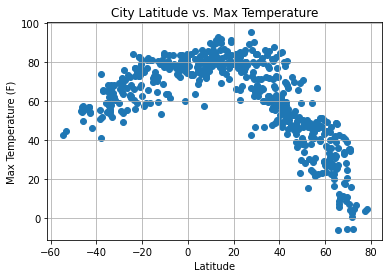

In [10]:
# Create Lat vs. Temp scatter plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save plot as png
plt.savefig("lat vs temp plot.png")

## Latitude vs. Humidity Plot

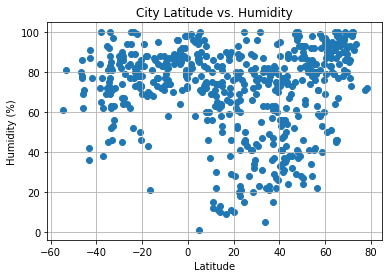

In [11]:
#Create Lat vs. Humidity Scatter Plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save plot as png
plt.savefig("lat vs humidity plot.png")

## Latitude vs. Cloudiness Plot

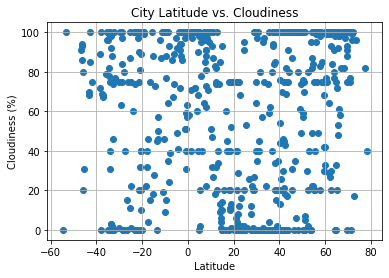

In [12]:
#Create Lat vs. Cloudiness Scatter Plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save plot as png
plt.savefig("lat vs cloud plot.png")

## Latitude vs. Wind Speed Plot

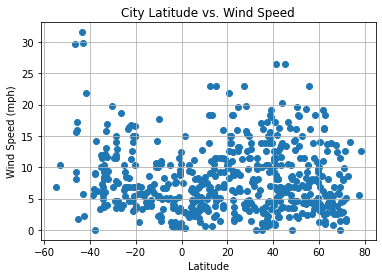

In [13]:
#Create Lat vs. Cloudiness Scatter Plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save plot as png
plt.savefig("lat vs wind plot.png")

## Linear Regression

In [14]:
#set up hemisphere using latitudes
northern_hemisphere = weather_city_df.loc[weather_city_df["Lat"] >= 0]
southern_hemisphere = weather_city_df.loc[weather_city_df["Lat"] < 0]

In [15]:
#define function for linear agression and scatterplott
def linear_agression(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is: {rvalue}")
    return line_eq
    

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=12,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.857018758956691


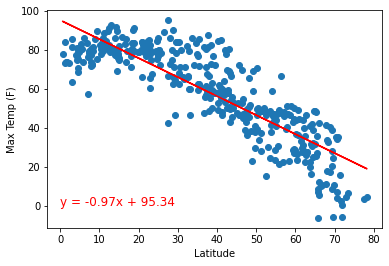

In [16]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#save png file
plt.savefig("Northern Hemisphere - Max Temp vs Lat Linear Regress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7446855188163738


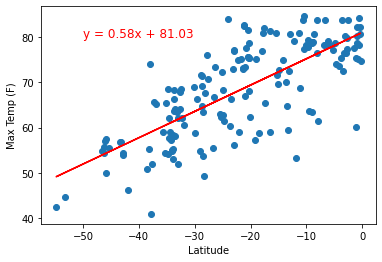

In [17]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, -50, 80)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#save png file
plt.savefig("Southern Hemisphere - Max Temp vs Lat Linear Regress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2232311153154847


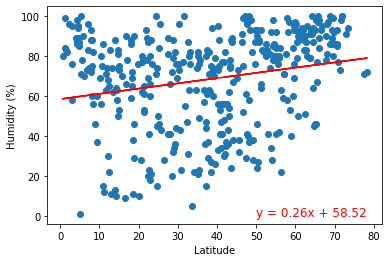

In [19]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 50, 0)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save png file
plt.savefig("Northern Hemisphere - Humidity vs Lat Linear Regress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2551654246516531


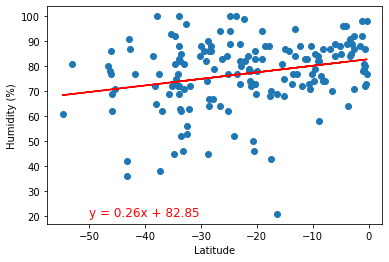

In [20]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -50, 20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save png file
plt.savefig("Southern Hemisphere - Humidity vs Lat Linear Regress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22065373124274384


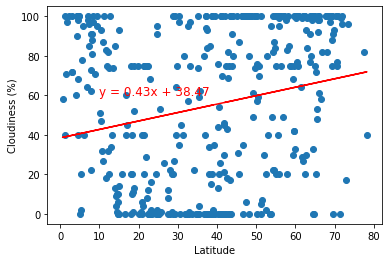

In [21]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 10, 60)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save png file
plt.savefig("Northern Hemisphere - Cloudiness vs Lat Linear Regress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09374000331166761


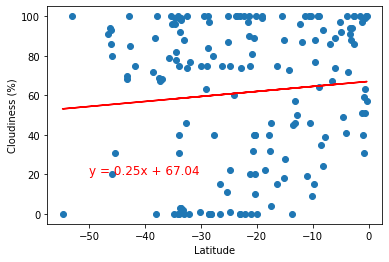

In [22]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save png file
plt.savefig("Southern Hemisphere - Cloudiness vs Lat Linear Regress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.014261039397903975


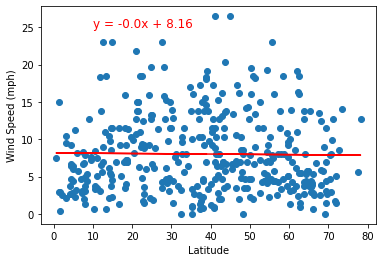

In [23]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 10, 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save png file
plt.savefig("Northern Hemisphere - Wind Speed vs Lat Linear Regress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3664310245691488


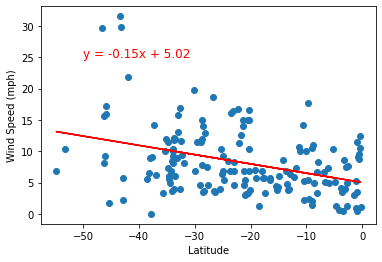

In [25]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -50, 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save png file
plt.savefig("Southern Hemisphere - Wind Speed vs Lat Linear Regress.png")